## Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('superstore_sale.csv')

# Setting the theme for matplotlib
plt.style.use('seaborn-whitegrid')

# Data Preprocessing
df.drop('Row ID', axis=1, inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df.sort_values(by=['Order Date'], inplace=True, ascending=True)
df.set_index("Order Date", inplace=True)
df['Postal Code'] = df['Postal Code'].fillna(5401)

C:\Users\pakon\AppData\Local\Temp\ipykernel_6280\70824694.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Exploratory Data Analysis

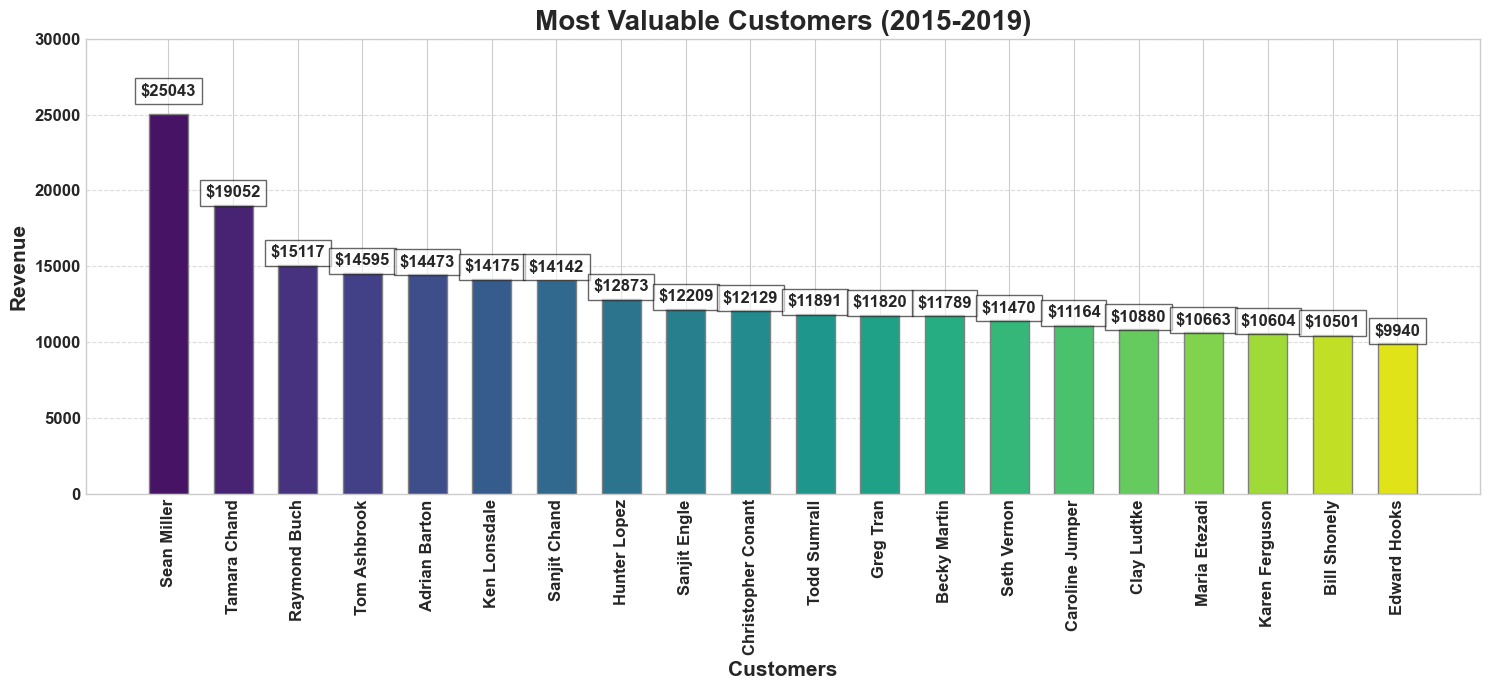

In [2]:
# Most Valuable Customers
Top_customers = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(20).reset_index()

plt.figure(figsize=(15, 7))
plt.title("Most Valuable Customers (2015-2019)", fontsize=20, fontweight='bold')

bars = plt.bar(Top_customers["Customer Name"], Top_customers["Sales"], color=sns.color_palette("viridis", 20), edgecolor='grey', linewidth=1, width=0.6)

plt.xlabel("Customers", fontsize=15, fontweight='bold')
plt.ylabel("Revenue", fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, rotation=90, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.ylim(0, 30000)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    text_label = f'${int(yval)}'
    if yval == Top_customers["Sales"].max():
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, text_label, ha='center', va='bottom', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))
    else:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 300, text_label, ha='center', va='bottom', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()

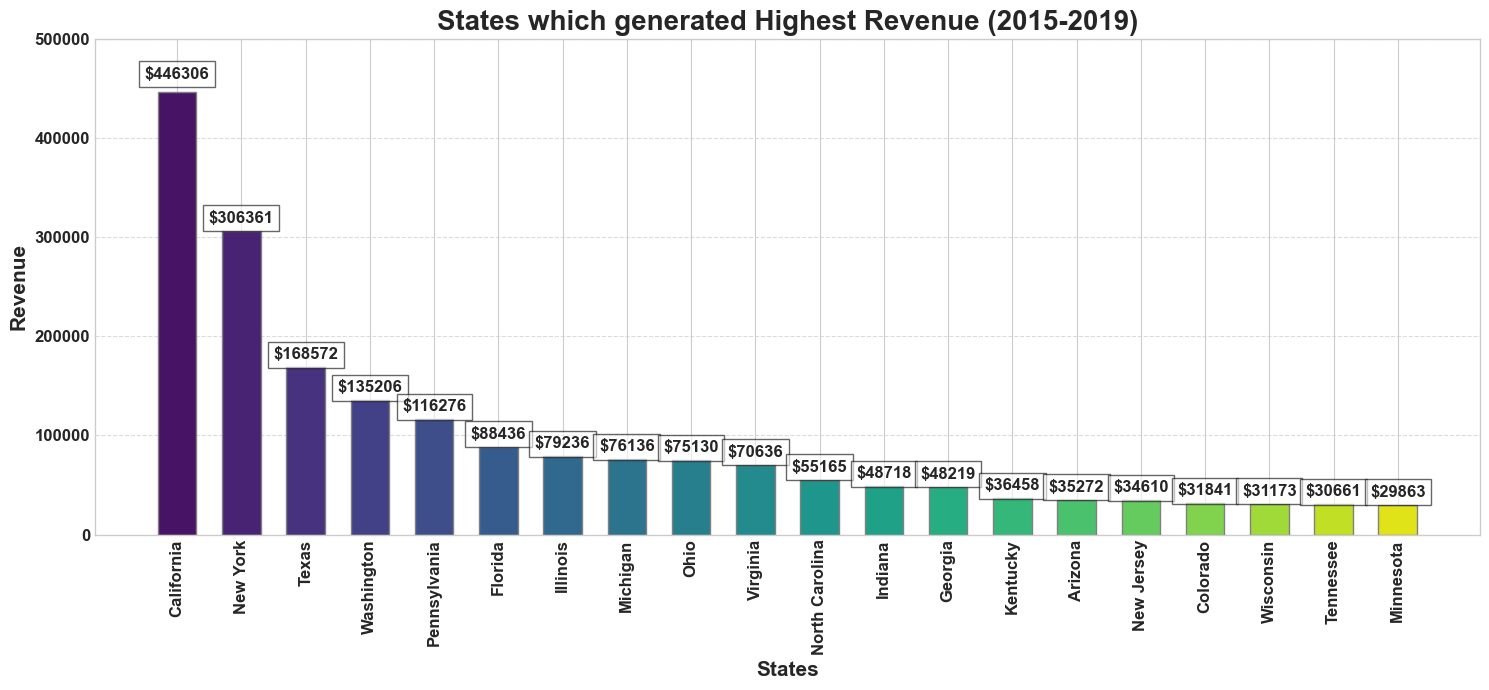

In [3]:
# Most Valuable States
Top_states = df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(20).reset_index()

plt.figure(figsize=(15, 7))
plt.title("States which generated Highest Revenue (2015-2019)", fontsize=20, fontweight='bold')  # Increased font size for title

bars = plt.bar(Top_states["State"], Top_states["Sales"], color=sns.color_palette("viridis", 20), edgecolor='grey', linewidth=1, width=0.6)

plt.xlabel("States", fontsize=15, fontweight='bold')
plt.ylabel("Revenue", fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, rotation=90, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.ylim(0, 500000) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    text_label = f'${int(yval)}'
    if yval == Top_states["Sales"].max():
        plt.text(bar.get_x() + bar.get_width()/2, yval + 10000, text_label, ha='center', va='bottom', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))
    else:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5000, text_label, ha='center', va='bottom', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()

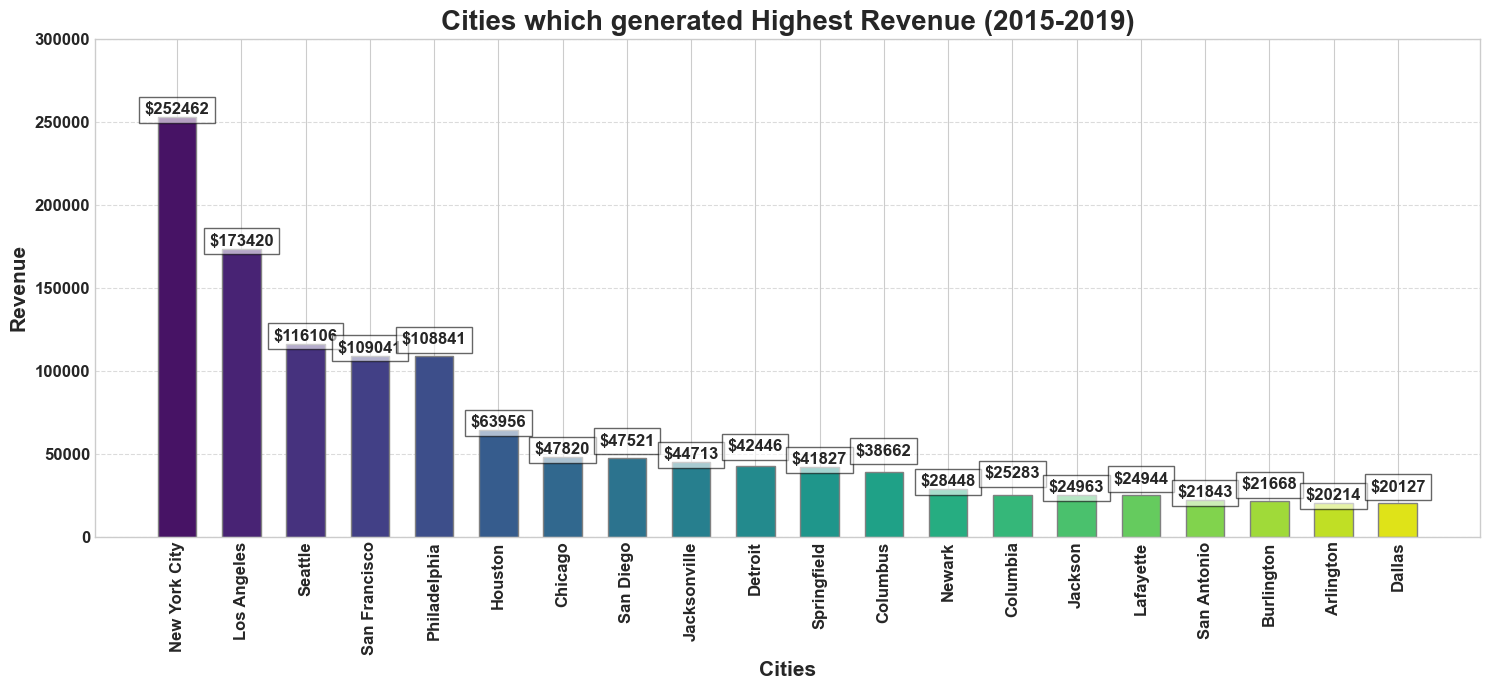

In [4]:
# Most Valuable Cities
Top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(20).reset_index()

plt.figure(figsize=(15, 7))
plt.title("Cities which generated Highest Revenue (2015-2019)", fontsize=20, fontweight='bold')

bars = plt.bar(Top_cities["City"], Top_cities["Sales"], color=sns.color_palette("viridis", 20), edgecolor='grey', linewidth=1, width=0.6)

plt.xlabel("Cities", fontsize=15, fontweight='bold')
plt.ylabel("Revenue", fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, rotation=90, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.ylim(0, 300000) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 

last_yval = 0
offset = 5000 
for bar in bars:
    yval = bar.get_height()
    text_yval = yval
    if last_yval != 0 and abs(yval - last_yval) < offset:
        text_yval = last_yval + offset
    plt.text(bar.get_x() + bar.get_width()/2, text_yval, f'${int(bar.get_height())}', ha='center', va='bottom', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))
    last_yval = text_yval

plt.tight_layout()  
plt.show()

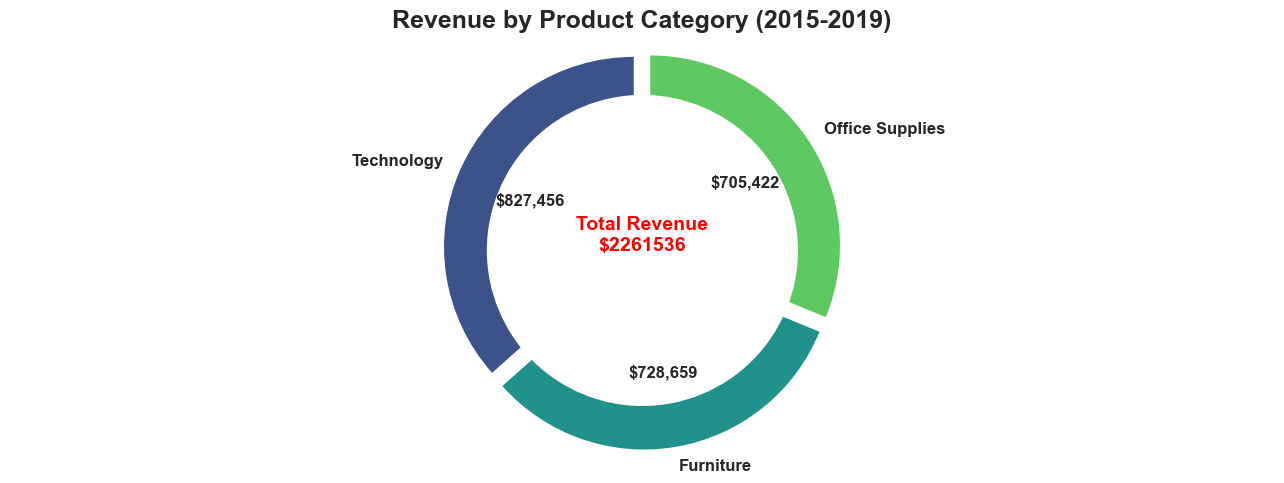

In [5]:
# Revenue by Product Category
numeric_df = df.select_dtypes(exclude=['datetime'])
Top_category = numeric_df.groupby(["Category"]).sum().sort_values("Sales", ascending=False)
Top_category = Top_category[["Sales"]]
total_revenue_category = Top_category["Sales"].sum()
total_revenue_category = '$' + str(int(total_revenue_category))
Top_category.reset_index(inplace=True)

plt.rcParams["figure.figsize"] = (13, 5)
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.weight'] = 'bold'

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'${val:,d}'
    return my_format

colors = sns.color_palette("viridis", len(Top_category))
explode = [0.05] * len(Top_category)

fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(Top_category['Sales'], colors=colors, labels=Top_category['Category'],
                                   autopct=autopct_format(Top_category['Sales']), startangle=90, explode=explode)

centre_circle = plt.Circle((0, 0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')

plt.title('Revenue by Product Category (2015-2019)', fontsize=18, fontweight='bold')

label = ax1.annotate(f'Total Revenue\n{total_revenue_category}', color='red', xy=(0, 0), fontsize=14, ha="center", fontweight='bold')

for autotext in autotexts:
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

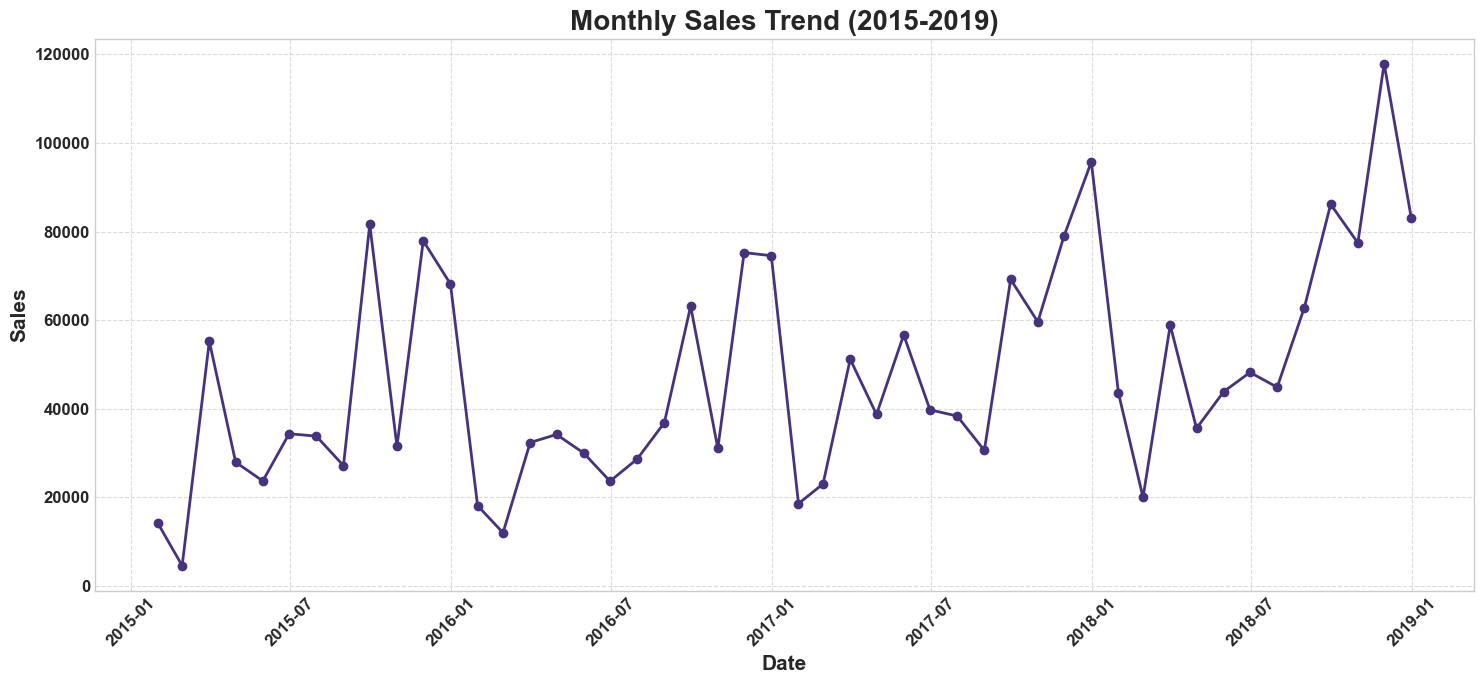

In [6]:
# Monthly Sales Trend Analysis
monthly_sales = df['Sales'].resample('M').sum()

plt.figure(figsize=(15, 7))
plt.title('Monthly Sales Trend (2015-2019)', fontsize=20, fontweight='bold') 
plt.plot(monthly_sales, marker='o', linestyle='-', color=sns.color_palette("viridis")[0], linewidth=2)

plt.xlabel('Date', fontsize=15, fontweight='bold')
plt.ylabel('Sales', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)  

plt.tight_layout()  
plt.show()

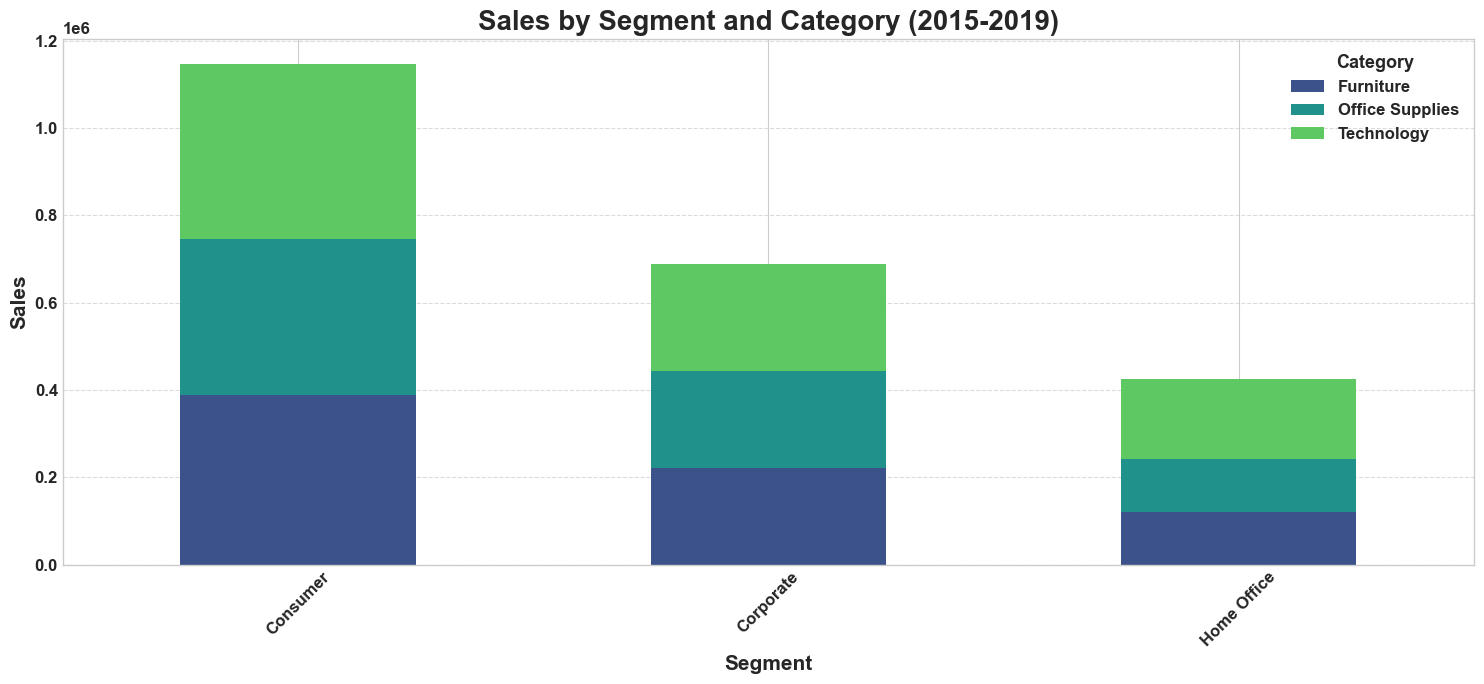

In [7]:
# Sales by Segment and Category
segment_category_sales = df.groupby(['Segment', 'Category'])['Sales'].sum().unstack()

plt.figure(figsize=(15, 7))
plt.title('Sales by Segment and Category (2015-2019)', fontsize=20, fontweight='bold')

colors = sns.color_palette("viridis", len(segment_category_sales.columns))
segment_category_sales.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())

plt.xlabel('Segment', fontsize=15, fontweight='bold')
plt.ylabel('Sales', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(title='Category', fontsize=12, title_fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()